In [11]:
conda install geopandas

Jupyter detected...
2 channel Terms of Service accepted
Channels:
 - defaults
Platform: osx-arm64
doneecting package metadata (repodata.json): - 
doneing environment: \ 

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [329]:
# import libraries

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [13]:
# import UK Co-benefit data to pandas dataframes

#data 3

path3 = '/Users/juditremenyi/Desktop/Data_Lab_Community/Competition_Data_Visualization_2025/UK_Cobenefit_Atlas_Original_files/Data/Level_3.csv'
df3 = [chunk for chunk in pd.read_csv(path3, chunksize = 18000)]
data3 = pd.concat(df3)

data3

#lookups

path_lookups = '/Users/juditremenyi/Desktop/Data_Lab_Community/Competition_Data_Visualization_2025/UK_Cobenefit_Atlas_Original_files/Lookups/Lookups.csv'
lookups = pd.read_csv(path_lookups)

lookups


,small_area,population,households,local_authority,nation
0,E01000001,1721,838,City of London,Eng/Wales
1,E01000002,1608,824,City of London,Eng/Wales
2,E01000003,1826,1017,City of London,Eng/Wales
3,E01000005,1605,480,City of London,Eng/Wales
4,E01000006,1833,554,Barking and Dagenham,Eng/Wales
...,...,...,...,...,...
46421,W01002036,1500,773,The Vale of Glamorgan,Eng/Wales
46422,W01002037,1070,565,The Vale of Glamorgan,Eng/Wales
46423,W01002038,1280,580,The Vale of Glamorgan,Eng/Wales
46424,W01002039,1865,668,The Vale of Glamorgan,Eng/Wales


In [14]:
# Merge data3 with lookups dataframe

data3_merged = pd.merge(data3, lookups, on = 'small_area', how = 'left')

print(data3_merged.info())
print(data3_merged.head())

print(data3_merged.value_counts('nation'))
print(data3_merged.value_counts('co-benefit_type'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928520 entries, 0 to 928519
Data columns (total 35 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   small_area       928520 non-null  object 
 1   co-benefit_type  928520 non-null  object 
 2   damage_pathway   928520 non-null  object 
 3   damage_type      928520 non-null  object 
 4   2025             928517 non-null  float64
 5   2026             928517 non-null  float64
 6   2027             928517 non-null  float64
 7   2028             928517 non-null  float64
 8   2029             928517 non-null  float64
 9   2030             928517 non-null  float64
 10  2031             928517 non-null  float64
 11  2032             928517 non-null  float64
 12  2033             928517 non-null  float64
 13  2034             928517 non-null  float64
 14  2035             928517 non-null  float64
 15  2036             928517 non-null  float64
 16  2037             928517 non-null  floa

In [15]:
# Filter data3_merged for the following 'nation': Scotland. New dataframe name is data3_merged_scotland

data3_merged_scotland = data3_merged[data3_merged['nation'].isin(['Scotland'])]

print(data3_merged_scotland.value_counts('nation'))

data3_merged_scotland

nation
Scotland    139520
Name: count, dtype: int64


,small_area,co-benefit_type,damage_pathway,damage_type,2025,2026,2027,2028,2029,2030,...,2046,2047,2048,2049,2050,sum,population,households,local_authority,nation
750660,S01006506,air_quality,reduced_mortality,health,0.001573,2.459878e-03,3.144647e-03,4.018640e-03,5.111402e-03,0.006685,...,0.039706,0.039769,0.039533,0.039276,0.039029,0.603480,863,442,Aberdeen City,Scotland
750661,S01006506,air_quality,society,non-health,0.000018,2.890000e-05,3.700000e-05,4.730000e-05,6.010000e-05,0.000079,...,0.000467,0.000468,0.000465,0.000462,0.000459,0.007099,863,442,Aberdeen City,Scotland
750662,S01006506,congestion,time_saved,non-health,0.000724,1.245926e-03,1.619279e-03,1.871983e-03,2.016920e-03,0.002391,...,-0.003366,-0.003648,-0.003947,-0.004196,-0.004850,-0.017220,863,442,Aberdeen City,Scotland
750663,S01006506,dampness,NHS,non-health,0.000000,1.020000e-05,1.130000e-05,1.490000e-05,1.490000e-05,0.000123,...,0.000299,0.000298,0.000296,0.000300,0.000313,0.004486,863,442,Aberdeen City,Scotland
750664,S01006506,dampness,QALY,health,0.000000,2.490000e-07,2.760000e-07,3.660000e-07,3.640000e-07,0.000003,...,0.000007,0.000007,0.000007,0.000007,0.000008,0.000110,863,442,Aberdeen City,Scotland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890175,S01013481,noise,sleep_disturbance,health,0.000000,0.000000e+00,1.799443e-03,4.594377e-03,1.112074e-02,0.012441,...,0.025697,0.025042,0.024407,0.023790,0.023387,0.494634,923,386,West Lothian,Scotland
890176,S01013481,physical_activity,reduced_mortality,health,0.021798,3.121448e-02,3.842018e-02,4.443892e-02,5.002412e-02,0.055456,...,0.086135,0.087351,0.088558,0.089726,0.090824,1.771769,923,386,West Lothian,Scotland
890177,S01013481,road_repairs,society,non-health,0.000016,6.140000e-06,-4.440000e-06,-1.600000e-05,-1.100000e-05,-0.000009,...,-0.000100,-0.000103,-0.000107,-0.000109,-0.000121,-0.001396,923,386,West Lothian,Scotland
890178,S01013481,road_safety,reduced_mortality,health,0.000175,2.922500e-04,3.843490e-04,4.505120e-04,4.940070e-04,0.000555,...,-0.000989,-0.001091,-0.001199,-0.001296,-0.001519,-0.006322,923,386,West Lothian,Scotland


In [16]:
# Filter data3_merged_scotland for the following 'co-benefit_type's: dampness, excess_cold, excess_heat, air_quality, diet_change, physical_activity. New dataframe name is data3_merged_scotland_f1

data3_merged_scotland_f1 = data3_merged_scotland[data3_merged_scotland['co-benefit_type'].isin(['dampness', 'excess_cold', 'excess_heat', 'air_quality', 'diet_change', 'physical_activity'])]

print(data3_merged_scotland_f1.value_counts('co-benefit_type'))

data3_merged_scotland_f1


co-benefit_type
dampness             20928
excess_cold          20928
excess_heat          20928
air_quality          13952
diet_change           6976
physical_activity     6976
Name: count, dtype: int64


,small_area,co-benefit_type,damage_pathway,damage_type,2025,2026,2027,2028,2029,2030,...,2046,2047,2048,2049,2050,sum,population,households,local_authority,nation
750660,S01006506,air_quality,reduced_mortality,health,0.001573,2.459878e-03,3.144647e-03,4.018640e-03,5.111402e-03,6.685179e-03,...,3.970620e-02,3.976941e-02,3.953283e-02,3.927571e-02,3.902943e-02,6.034800e-01,863,442,Aberdeen City,Scotland
750661,S01006506,air_quality,society,non-health,0.000018,2.890000e-05,3.700000e-05,4.730000e-05,6.010000e-05,7.860000e-05,...,4.670900e-04,4.678340e-04,4.650510e-04,4.620260e-04,4.591290e-04,7.099130e-03,863,442,Aberdeen City,Scotland
750663,S01006506,dampness,NHS,non-health,0.000000,1.020000e-05,1.130000e-05,1.490000e-05,1.490000e-05,1.225340e-04,...,2.985380e-04,2.975200e-04,2.963800e-04,3.000370e-04,3.129150e-04,4.485762e-03,863,442,Aberdeen City,Scotland
750664,S01006506,dampness,QALY,health,0.000000,2.490000e-07,2.760000e-07,3.660000e-07,3.640000e-07,3.000000e-06,...,7.310000e-06,7.280000e-06,7.260000e-06,7.350000e-06,7.660000e-06,1.098210e-04,863,442,Aberdeen City,Scotland
750665,S01006506,dampness,society,non-health,0.000000,1.580000e-05,1.740000e-05,2.310000e-05,2.300000e-05,1.896160e-04,...,4.619750e-04,4.604000e-04,4.586350e-04,4.642950e-04,4.842230e-04,6.941531e-03,863,442,Aberdeen City,Scotland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890169,S01013481,excess_cold,society,non-health,0.000000,0.000000e+00,5.460000e-05,1.381840e-04,2.474090e-04,1.181532e-03,...,8.452362e-03,8.393406e-03,8.319307e-03,8.279074e-03,8.280435e-03,1.080124e-01,923,386,West Lothian,Scotland
890170,S01013481,excess_heat,NHS,non-health,0.000000,0.000000e+00,2.400000e-11,-1.190000e-10,-1.560000e-10,-6.140000e-10,...,5.360000e-09,5.430000e-09,5.610000e-09,5.710000e-09,9.370000e-09,7.370000e-08,923,386,West Lothian,Scotland
890171,S01013481,excess_heat,QALY,health,0.000000,0.000000e+00,2.390000e-10,-1.190000e-09,-1.560000e-09,-6.120000e-09,...,5.340000e-08,5.410000e-08,5.590000e-08,5.700000e-08,9.340000e-08,7.350000e-07,923,386,West Lothian,Scotland
890172,S01013481,excess_heat,society,non-health,0.000000,0.000000e+00,4.130000e-10,-2.050000e-09,-2.690000e-09,-1.060000e-08,...,9.220000e-08,9.340000e-08,9.650000e-08,9.830000e-08,1.610000e-07,1.270000e-06,923,386,West Lothian,Scotland


damage_pathway
society              41856
reduced_mortality    27904
NHS                  20928
QALY                 20928
time_saved           13952
amenity               6976
sleep_disturbance     6976
Name: count, dtype: int64
damage_pathway
society              27904
NHS                  20928
QALY                 20928
reduced_mortality    20928
Name: count, dtype: int64
0        POLYGON ((383285.265 800510.607, 383348.492 80...
1        POLYGON ((383285.265 800510.607, 383348.492 80...
2        POLYGON ((383285.265 800510.607, 383348.492 80...
3        POLYGON ((383285.265 800510.607, 383348.492 80...
4        POLYGON ((383285.265 800510.607, 383348.492 80...
                               ...                        
90683    POLYGON ((309949.893 672738.667, 309970.518 67...
90684    POLYGON ((309949.893 672738.667, 309970.518 67...
90685    POLYGON ((309949.893 672738.667, 309970.518 67...
90686    POLYGON ((309949.893 672738.667, 309970.518 67...
90687    POLYGON ((309949.893 6

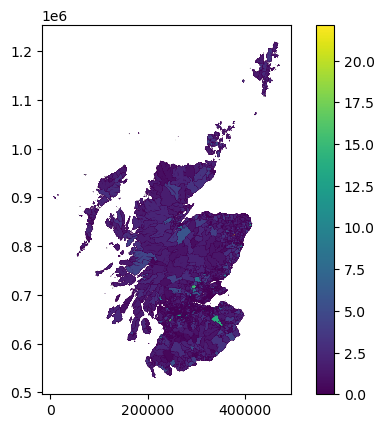

In [17]:
# Filter data3_merged_scotland_f1 for the following 'damage_pathway's: society, reduced_mortality, NHS, QALY. New dataframe name is data3_merged_scotland_f2

print(data3_merged_scotland.value_counts('damage_pathway'))
print(data3_merged_scotland_f1.value_counts('damage_pathway'))


# Read shp file and merge with data3_merged_scotland_f1 dataframe

path_shp = '/Users/juditremenyi/Desktop/Data_Lab_Community/Competition_Data_Visualization_2025/UK_Cobenefit_Atlas_Original_files/Shapefile/small_areas_british_grid.shp'

gpd_data = gpd.read_file(path_shp)

gpd_data3_merged_scotland_f1 = pd.merge(gpd_data, data3_merged_scotland_f1, on = 'small_area', how = 'right')


'''
data3_merged_scotland_f2 = data3_merged_scotland_f1[data3_merged_scotland_f1['damage_pathway'].isin(['society', 'reduced_mortality', 'NHS', 'QALY'])]

print(data3_merged_scotland_f2.value_counts('damage_pathway'))
'''


gpd_data3_merged_scotland_f1


print(gpd_data3_merged_scotland_f1['geometry'])

gpd_data3_merged_scotland_f1['geometry'] = gpd_data3_merged_scotland_f1['geometry'].set_precision(10, mode = 'valid_output')

gpd_data3_merged_scotland_f1.plot('sum', legend = True, cmap = 'viridis')


#To write to GeoJSON

gpd_data3_merged_scotland_f1.to_file("Scotland_map.json", driver="GeoJSON")


In [18]:
# import SIMD2020 data to pandas dataframes

#SIMD+2020v2+-+indicators-2_mod as scot_dep_v2

scot_dep_v2_path = '/Users/juditremenyi/Desktop/Data_Lab_Community/Competition_Data_Visualization_2025/Additional_datasets/SIMD_2020v2/SIMD2020_for_making_Scotland_map/SIMD+2020v2+-+indicators-2_mod.csv'

scot_dep_v2 = pd.read_csv(scot_dep_v2_path)

scot_dep_v2


#SIMD+2020v2+-+datazone+lookup+-+updated+2025_mod as scot_dep_v2_lookup

scot_dep_v2_lookup_path = '/Users/juditremenyi/Desktop/Data_Lab_Community/Competition_Data_Visualization_2025/Additional_datasets/SIMD_2020v2/SIMD2020_for_making_Scotland_map/SIMD+2020v2+-+datazone+lookup+-+updated+2025_mod.csv'

scot_dep_v2_lookup = pd.read_csv(scot_dep_v2_lookup_path)

scot_dep_v2_lookup




,DZ,DZname,SIMD2020v2_Rank,SIMD2020v2_Vigintile,SIMD2020v2_Decile,SIMD2020v2_Quintile,SIMD2020_Employment_Domain_Rank,SIMD2020_Health_Domain_Rank,Population,Working_Age_Population,...,Izcode,Izname,LAcode,Laname,HBcode,HBname,MMWcode,MMWname,SPCcode,SPCname
0,S01006506,Culter - 01,4691,14,7,4,3220,5174,894,580,...,S02001236,Culter,S12000033,Aberdeen City,S08000020,Grampian,S13002843,Lower Deeside,S16000076,Aberdeen South and North Kincardine
1,S01006507,Culter - 02,4862,14,7,4,4481,5051,793,470,...,S02001236,Culter,S12000033,Aberdeen City,S08000020,Grampian,S13002843,Lower Deeside,S16000076,Aberdeen South and North Kincardine
2,S01006508,Culter - 03,5686,17,9,5,5110,5942,624,461,...,S02001236,Culter,S12000033,Aberdeen City,S08000020,Grampian,S13002843,Lower Deeside,S16000076,Aberdeen South and North Kincardine
3,S01006509,Culter - 04,4332,13,7,4,3229,3871,537,307,...,S02001236,Culter,S12000033,Aberdeen City,S08000020,Grampian,S13002843,Lower Deeside,S16000076,Aberdeen South and North Kincardine
4,S01006510,Culter - 05,3913,12,6,3,3448,3049,663,415,...,S02001236,Culter,S12000033,Aberdeen City,S08000020,Grampian,S13002843,Lower Deeside,S16000076,Aberdeen South and North Kincardine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6971,S01013477,Broxburn South - 06,2464,8,4,2,2442,2545,612,355,...,S02002513,Broxburn South,S12000040,West Lothian,S08000024,Lothian,S13002821,Broxburn/Uphall/Winchburgh,S16000128,Linlithgow
6972,S01013478,Broxburn East - 01,3681,11,6,3,3297,2950,817,582,...,S02002514,Broxburn East,S12000040,West Lothian,S08000024,Lothian,S13002821,Broxburn/Uphall/Winchburgh,S16000128,Linlithgow
6973,S01013479,Broxburn East - 02,1423,5,3,2,1301,1240,785,479,...,S02002514,Broxburn East,S12000040,West Lothian,S08000024,Lothian,S13002821,Broxburn/Uphall/Winchburgh,S16000128,Linlithgow
6974,S01013480,Broxburn East - 03,3291,10,5,3,3177,2703,677,410,...,S02002514,Broxburn East,S12000040,West Lothian,S08000024,Lothian,S13002821,Broxburn/Uphall/Winchburgh,S16000128,Linlithgow


In [19]:
# Merge scot_dep_v2 with scot_dep_v2_lookup dataframe

scot_dep_v2_merged = pd.merge(scot_dep_v2, scot_dep_v2_lookup, left_on = 'Data_Zone', right_on = 'DZ', how = 'left')

print(scot_dep_v2_merged.info())
print(scot_dep_v2_merged.head())


scot_dep_v2_merged[['Working_age_population', 'Working_Age_Population']]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6976 entries, 0 to 6975
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Data_Zone                        6976 non-null   object
 1   Intermediate_Zone                6976 non-null   object
 2   Council_area                     6976 non-null   object
 3   Total_population                 6976 non-null   int64 
 4   Working_age_population           6976 non-null   int64 
 5   Employment_rate                  6976 non-null   object
 6   Employment_rate_percent          6976 non-null   object
 7   Employment_count                 6976 non-null   int64 
 8   CIF                              6976 non-null   object
 9   ALCOHOL                          6976 non-null   object
 10  DRUG                             6976 non-null   object
 11  SMR                              6976 non-null   object
 12  DEPRESS                          6

,Working_age_population,Working_Age_Population
0,580,580
1,470,470
2,461,461
3,307,307
4,415,415
...,...,...
6971,355,355
6972,582,582
6973,479,479
6974,410,410


In [20]:
# Merge scot_dep_v2_merged with data3_merged_scotland_f1 dataframe

scotland_map = pd.merge(data3_merged_scotland_f1, scot_dep_v2_merged, left_on = 'small_area', right_on = 'DZ', how = 'left')


print(scotland_map.info())
print(scotland_map.head())

print(scotland_map['2025'].max())

scotland_map


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90688 entries, 0 to 90687
Data columns (total 74 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   small_area                       90688 non-null  object 
 1   co-benefit_type                  90688 non-null  object 
 2   damage_pathway                   90688 non-null  object 
 3   damage_type                      90688 non-null  object 
 4   2025                             90688 non-null  float64
 5   2026                             90688 non-null  float64
 6   2027                             90688 non-null  float64
 7   2028                             90688 non-null  float64
 8   2029                             90688 non-null  float64
 9   2030                             90688 non-null  float64
 10  2031                             90688 non-null  float64
 11  2032                             90688 non-null  float64
 12  2033              

,small_area,co-benefit_type,damage_pathway,damage_type,2025,2026,2027,2028,2029,2030,...,Izcode,Izname,LAcode,Laname,HBcode,HBname,MMWcode,MMWname,SPCcode,SPCname
0,S01006506,air_quality,reduced_mortality,health,0.001573,2.459878e-03,3.144647e-03,4.018640e-03,5.111402e-03,6.685179e-03,...,S02001236,Culter,S12000033,Aberdeen City,S08000020,Grampian,S13002843,Lower Deeside,S16000076,Aberdeen South and North Kincardine
1,S01006506,air_quality,society,non-health,0.000018,2.890000e-05,3.700000e-05,4.730000e-05,6.010000e-05,7.860000e-05,...,S02001236,Culter,S12000033,Aberdeen City,S08000020,Grampian,S13002843,Lower Deeside,S16000076,Aberdeen South and North Kincardine
2,S01006506,dampness,NHS,non-health,0.000000,1.020000e-05,1.130000e-05,1.490000e-05,1.490000e-05,1.225340e-04,...,S02001236,Culter,S12000033,Aberdeen City,S08000020,Grampian,S13002843,Lower Deeside,S16000076,Aberdeen South and North Kincardine
3,S01006506,dampness,QALY,health,0.000000,2.490000e-07,2.760000e-07,3.660000e-07,3.640000e-07,3.000000e-06,...,S02001236,Culter,S12000033,Aberdeen City,S08000020,Grampian,S13002843,Lower Deeside,S16000076,Aberdeen South and North Kincardine
4,S01006506,dampness,society,non-health,0.000000,1.580000e-05,1.740000e-05,2.310000e-05,2.300000e-05,1.896160e-04,...,S02001236,Culter,S12000033,Aberdeen City,S08000020,Grampian,S13002843,Lower Deeside,S16000076,Aberdeen South and North Kincardine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90683,S01013481,excess_cold,society,non-health,0.000000,0.000000e+00,5.460000e-05,1.381840e-04,2.474090e-04,1.181532e-03,...,S02002514,Broxburn East,S12000040,West Lothian,S08000024,Lothian,S13002821,Broxburn/Uphall/Winchburgh,S16000128,Linlithgow
90684,S01013481,excess_heat,NHS,non-health,0.000000,0.000000e+00,2.400000e-11,-1.190000e-10,-1.560000e-10,-6.140000e-10,...,S02002514,Broxburn East,S12000040,West Lothian,S08000024,Lothian,S13002821,Broxburn/Uphall/Winchburgh,S16000128,Linlithgow
90685,S01013481,excess_heat,QALY,health,0.000000,0.000000e+00,2.390000e-10,-1.190000e-09,-1.560000e-09,-6.120000e-09,...,S02002514,Broxburn East,S12000040,West Lothian,S08000024,Lothian,S13002821,Broxburn/Uphall/Winchburgh,S16000128,Linlithgow
90686,S01013481,excess_heat,society,non-health,0.000000,0.000000e+00,4.130000e-10,-2.050000e-09,-2.690000e-09,-1.060000e-08,...,S02002514,Broxburn East,S12000040,West Lothian,S08000024,Lothian,S13002821,Broxburn/Uphall/Winchburgh,S16000128,Linlithgow


In [21]:
#Calculation of average working population in scotland as mean_wps


mean_wps = scotland_map.groupby('small_area')['Working_age_population'].mean()

print(mean_wps)

total_wps = scotland_map.groupby('small_area')['Working_age_population'].mean().sum()

print(total_wps)

print(scotland_map[['small_area', 'Working_age_population']])


#Add new column for new job per working group population in small area with name 'new_job_per_wg_pop_sa'

scotland_map['new_job_per_wg_pop_sa'] = round((3463/total_wps) * scotland_map['Working_age_population'], 4)

scotland_map[['small_area', 'new_job_per_wg_pop_sa']]

small_area
S01006506    580.0
S01006507    470.0
S01006508    461.0
S01006509    307.0
S01006510    415.0
             ...  
S01013477    355.0
S01013478    582.0
S01013479    479.0
S01013480    410.0
S01013481    305.0
Name: Working_age_population, Length: 6976, dtype: float64
3494791.0
      small_area  Working_age_population
0      S01006506                     580
1      S01006506                     580
2      S01006506                     580
3      S01006506                     580
4      S01006506                     580
...          ...                     ...
90683  S01013481                     305
90684  S01013481                     305
90685  S01013481                     305
90686  S01013481                     305
90687  S01013481                     305

[90688 rows x 2 columns]


,small_area,new_job_per_wg_pop_sa
0,S01006506,0.5747
1,S01006506,0.5747
2,S01006506,0.5747
3,S01006506,0.5747
4,S01006506,0.5747
...,...,...
90683,S01013481,0.3022
90684,S01013481,0.3022
90685,S01013481,0.3022
90686,S01013481,0.3022


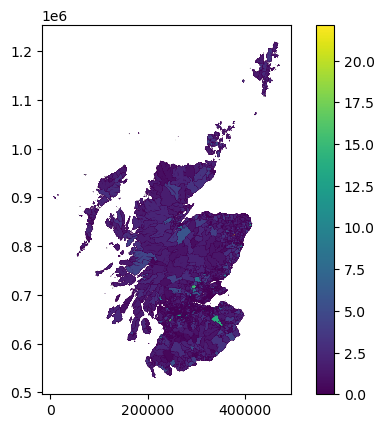

In [23]:
# Read shp file and merge with scotland_map dataframe

path_shp = '/Users/juditremenyi/Desktop/Data_Lab_Community/Competition_Data_Visualization_2025/UK_Cobenefit_Atlas_Original_files/Shapefile/small_areas_british_grid.shp'

gpd_data = gpd.read_file(path_shp)

gpd_scotland_map = pd.merge(gpd_data, scotland_map, on = 'small_area', how = 'right')

gpd_scotland_map

gpd_scotland_map['geometry'] = gpd_scotland_map['geometry'].set_precision(10, mode = 'valid_output')

gpd_scotland_map.plot('sum', legend = True, cmap = 'viridis')


#To write to GeoJSON

gpd_scotland_map.to_file("Scotland_job_map.json", driver="GeoJSON")


                 sum  SIMD2020_Health_Domain_Rank
small_area                                       
S01006506   2.641021                       5174.0
S01006507   1.948014                       5051.0
S01006508   1.382464                       5942.0
S01006509   1.449185                       3871.0
S01006510   1.605229                       3049.0
...              ...                          ...
S01013477   0.996915                       2545.0
S01013478   1.599785                       2950.0
S01013479   1.600056                       1240.0
S01013480   1.127505                       2703.0
S01013481   2.675031                       4029.0

[6976 rows x 2 columns]
6976.0


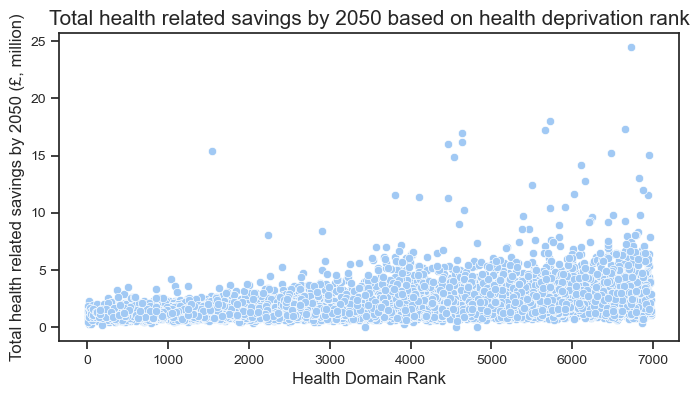

In [444]:
#Scatter graph - SIMD2020_Health_Domain_Rank vs Total Health Related savings in Scotland

health_scatter_df = pd.DataFrame()

#health_scatter_df['small_area'] = scotland_map['small_area'].unique()
health_scatter_df['sum'] = scotland_map[['small_area', 'sum']].groupby(['small_area']).sum('sum')
health_scatter_df['SIMD2020_Health_Domain_Rank'] = scotland_map[['small_area', 'SIMD2020_Health_Domain_Rank']].groupby(['small_area']).mean('SIMD2020_Health_Domain_Rank')
print(health_scatter_df)
print(health_scatter_df['SIMD2020_Health_Domain_Rank'].max())



plt.figure(figsize=(8, 4), dpi = 100)
sns.set_theme(style="ticks", palette="pastel", font_scale = 1.25)
sns.scatterplot(data = health_scatter_df, x = 'SIMD2020_Health_Domain_Rank', y = 'sum').set(title = 'Total health related savings by 2050 based on health deprivation rank')
plt.xlabel('Health Domain Rank', fontsize = 12)
plt.xticks(fontsize = 10)
plt.ylabel('Total health related savings by 2050 (£, million)', fontsize = 12)
plt.yticks(fontsize = 10)


plt.savefig("f1.png", bbox_inches='tight')
plt.show()



total_health_savings_depriv_top10_sa:                   sum
small_area          
S01006559   2.315967
S01006561   3.347200
S01006573   3.966391
S01006581   4.732202
S01008066   4.256016
S01008394   3.919897
S01008622   1.099181
S01008626   3.911491
S01008861   3.992078
S01008896   2.341771
total_health_savings_depriv_top10:  33.88219478799999
float64
total_health_savings_depriv_bottom_10_sa:                   sum
small_area          
S01007465   1.175044
S01007801   1.535485
S01009622   1.227134
S01010122   0.521964
S01010245   0.598974
S01010644   0.977953
S01010891   0.762319
S01011598   0.702294
S01012067   0.906565
S01012068   0.502499
total_health_savings_depriv_bottom_10:  8.910231843690001
float64
8.910231843690001
                            deprivation  value_sum
0     total_health_savings_depriv_top10  33.882195
1  total_health_savings_depriv_bottom10   8.910232


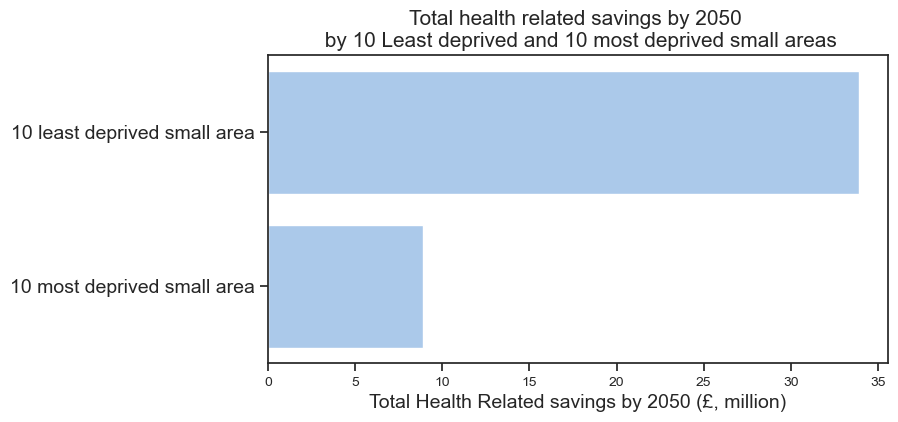

In [443]:
#Bar chart - 10 most deprived and 10 least deprived area vs Total health savings

deprivation_top10_bottom10_df = pd.DataFrame()

deprivation_top10_bottom10_df = scotland_map[scotland_map['SIMD2020v2_Rank'].isin([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 6976, 6975, 6974, 6973, 6972, 6971, 6970, 6969, 6968, 6967])]
deprivation_top10_bottom10_df[['small_area', 'SIMD2020v2_Rank']].groupby('small_area').value_counts()

deprivation_top10 = scotland_map[scotland_map['SIMD2020v2_Rank'].isin([6976, 6975, 6974, 6973, 6972, 6971, 6970, 6969, 6968, 6967])]
total_health_savings_depriv_top10_sa = deprivation_top10[['small_area', 'sum']].groupby('small_area').sum('sum')
print('total_health_savings_depriv_top10_sa: ', total_health_savings_depriv_top10_sa)
total_health_savings_depriv_top10 = deprivation_top10['sum'].sum()
print('total_health_savings_depriv_top10: ', total_health_savings_depriv_top10)
print(total_health_savings_depriv_top10.dtype)

deprivation_bottom10 = scotland_map[scotland_map['SIMD2020v2_Rank'].isin([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])]
total_health_savings_depriv_bottom_10_sa = deprivation_bottom10[['small_area', 'sum']].groupby('small_area').sum('sum')
print('total_health_savings_depriv_bottom_10_sa: ', total_health_savings_depriv_bottom_10_sa)
total_health_savings_depriv_bottom_10 = deprivation_bottom10['sum'].sum()
print('total_health_savings_depriv_bottom_10: ', total_health_savings_depriv_bottom_10)
print(total_health_savings_depriv_bottom_10.dtype)

print(total_health_savings_depriv_bottom_10)

total_health_savings_top10_bottom10_depr_df = pd.DataFrame()
total_health_savings_top10_bottom10_depr_df['deprivation'] = ['total_health_savings_depriv_top10', 'total_health_savings_depriv_bottom10']
total_health_savings_top10_bottom10_depr_df['value_sum'] = [33.88219478799999, 8.910231843690001]
print(total_health_savings_top10_bottom10_depr_df)


#total_health_savings_top10_bottom10_depr_df['total_health_savings_depriv_top10'] = [total_health_savings_depriv_top10]
#total_health_savings_top10_bottom10_depr_df
#total_health_savings_top10_bottom10_depr_df['total_health_savings_depriv_bottom10'] =  [total_health_savings_depriv_bottom_10]
#total_health_savings_top10_bottom10_depr_df


plt.figure(figsize=(8, 4), dpi = 100)
sns.set_theme(style="ticks", palette="pastel", font_scale = 1.25)
sns.barplot(data = total_health_savings_top10_bottom10_depr_df, x = 'value_sum', y = 'deprivation', orient = 'h').set(title = 'Total health related savings by 2050 \n by 10 Least deprived and 10 most deprived small areas')
plt.xlabel('Total Health Related savings by 2050 (£, million)', fontsize = 14)
plt.xticks(fontsize = 10)
plt.ylabel('', fontsize = 12)
plt.yticks(['total_health_savings_depriv_top10', 'total_health_savings_depriv_bottom10'], ['10 least deprived small area','10 most deprived small area'], fontsize = 14)


plt.savefig("f2.png", bbox_inches='tight')
plt.show()


<class 'pandas.core.frame.DataFrame'>
Index: 260 entries, 689 to 72318
Data columns (total 75 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   small_area                       260 non-null    object 
 1   co-benefit_type                  260 non-null    object 
 2   damage_pathway                   260 non-null    object 
 3   damage_type                      260 non-null    object 
 4   2025                             260 non-null    float64
 5   2026                             260 non-null    float64
 6   2027                             260 non-null    float64
 7   2028                             260 non-null    float64
 8   2029                             260 non-null    float64
 9   2030                             260 non-null    float64
 10  2031                             260 non-null    float64
 11  2032                             260 non-null    float64
 12  2033                   

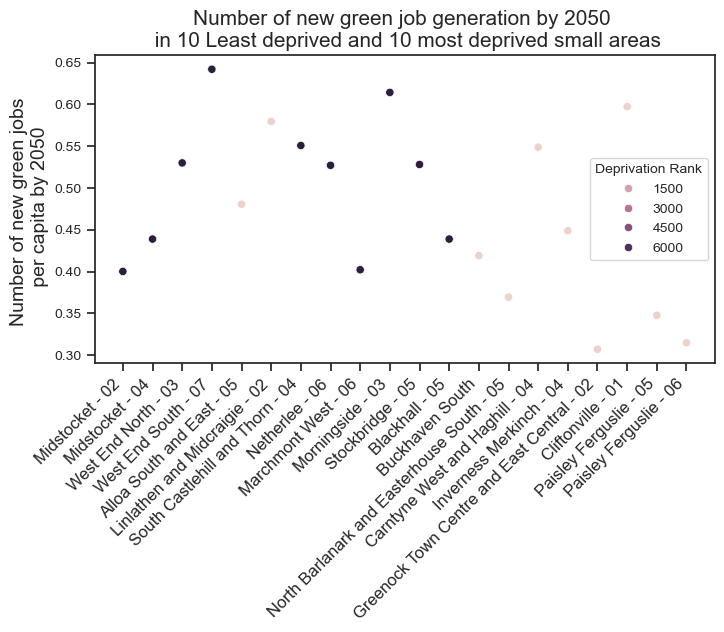

In [441]:
#Scatter graph or bar chart - 10 most deprived and 10 least deprived area vs green job creation

deprivation_top10_bottom10_df = pd.DataFrame()

deprivation_top10_bottom10_df = scotland_map[scotland_map['SIMD2020v2_Rank'].isin([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 6976, 6975, 6974, 6973, 6972, 6971, 6970, 6969, 6968, 6967])]
deprivation_top10_bottom10_df[['small_area', 'SIMD2020v2_Rank', 'new_job_per_wg_pop_sa', 'DZname', 'SIMD2020_Health_Domain_Rank', 'SIMD2020_Employment_Domain_Rank']].groupby('small_area').value_counts()
print(deprivation_top10_bottom10_df.info())

job_top10_bottom10 = deprivation_top10_bottom10_df[['small_area', 'sum', 'new_job_per_wg_pop_sa', 'DZname', 'SIMD2020v2_Rank']].groupby(['small_area', 'DZname']).mean('new_job_per_wg_pop_sa')
print(job_top10_bottom10)

print(job_top10_bottom10.value_counts())
print(job_top10_bottom10.keys())


plt.figure(figsize=(8, 4), dpi = 100)
sns.set_theme(style="ticks", palette="pastel", font_scale = 1.25)
sns.scatterplot(data = job_top10_bottom10, x = 'DZname', y = 'new_job_per_wg_pop_sa', hue = 'SIMD2020v2_Rank').set(title = 'Number of new green job generation by 2050 \n in 10 Least deprived and 10 most deprived small areas')
plt.xlabel('', fontsize = 12)
plt.xticks(fontsize = 12, rotation = 45, horizontalalignment='right')
plt.ylabel('Number of new green jobs \n per capita by 2050', fontsize = 14)
plt.yticks(fontsize = 10)
plt.legend(loc='center right', title = 'Deprivation Rank', fontsize = 10, title_fontsize = 10)

plt.savefig("f3.png", bbox_inches='tight')
plt.show()


sum_air_quality:  3906.686149225
sum_dampness:  82.568495923
sum_excess_heat:  0.00912050683
sum_excess_cold:  610.3151986190001
sum_diet_change:  410.435755212
sum_physical_activity:  8428.687838508
co-benefit_type    damage_pathway     damage_type
air_quality        reduced_mortality  health         6976
                   society            non-health     6976
dampness           NHS                non-health     6976
                   QALY               health         6976
                   society            non-health     6976
diet_change        reduced_mortality  health         6976
excess_cold        NHS                non-health     6976
                   QALY               health         6976
                   society            non-health     6976
excess_heat        NHS                non-health     6976
                   QALY               health         6976
                   society            non-health     6976
physical_activity  reduced_mortality  health         6

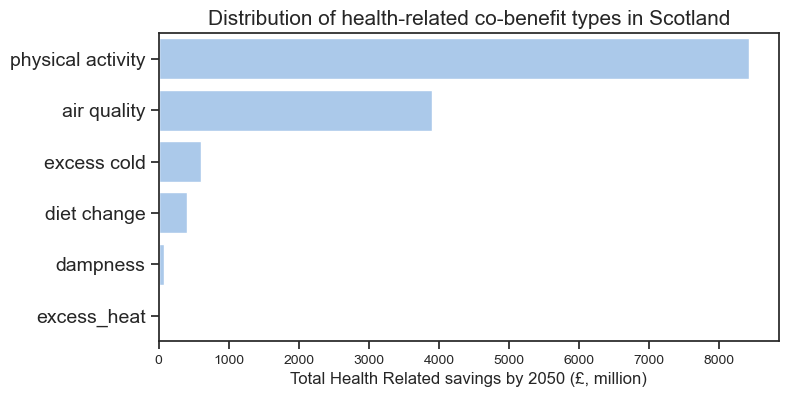

air_quality and reduced mortality and health:  3861.263579786
air_quality and society and non-health:  45.422569439
dampness and NHS and non-health:  32.103574158
dampness and QALY and health:  0.785963774
dampness and society and nonhealth:  49.678957991
diet_change and reduced mortality and health:  410.435755212
excess_cold and NHS and non-health:  21.656137520999998
excess_cold and QALY and health:  215.99150813300002
excess_cold and society and non-health:  372.667552965
excess_heat and NHS and non-health:  0.00032362463
excess_heat and QALY and health:  0.0032278997
excess_heat and society and non-health:  0.0055689825
physical_activity and reduced mortality and health:  8428.687838508


np.float64(0.00912050683)

In [445]:
#Treeplot - 6 Health related co-benefits - air_quality, dampness, excess_cold, excess_heat, physical_activity, diet_change

air_quality = scotland_map[scotland_map['co-benefit_type'].isin(['air_quality'])]
sum_air_quality = air_quality['sum'].sum()
print('sum_air_quality: ', sum_air_quality)

dampness = scotland_map[scotland_map['co-benefit_type'].isin(['dampness'])]
sum_dampness = dampness['sum'].sum()
print('sum_dampness: ', sum_dampness)

excess_heat = scotland_map[scotland_map['co-benefit_type'].isin(['excess_heat'])]
sum_excess_heat = excess_heat['sum'].sum()
print('sum_excess_heat: ', sum_excess_heat)

excess_cold = scotland_map[scotland_map['co-benefit_type'].isin(['excess_cold'])]
sum_excess_cold = excess_cold['sum'].sum()
print('sum_excess_cold: ', sum_excess_cold)

diet_change = scotland_map[scotland_map['co-benefit_type'].isin(['diet_change'])]
sum_diet_change = diet_change['sum'].sum()
print('sum_diet_change: ', sum_diet_change)

physical_activity = scotland_map[scotland_map['co-benefit_type'].isin(['physical_activity'])]
sum_physical_activity = physical_activity['sum'].sum()
print('sum_physical_activity: ', sum_physical_activity)

print(scotland_map[['co-benefit_type', 'damage_pathway', 'damage_type']].value_counts()) 

#new DataFrame with co-benefit splitting and total sum savings for Scotland
totsum_cobenefit_df = pd.DataFrame()
totsum_cobenefit_df['cobenefit_type'] = ['air_quality', 'dampness', 'excess_heat', 'excess_cold', 'diet_change', 'physical_activity']
totsum_cobenefit_df['sum_cobenefit'] = [sum_air_quality, sum_dampness, sum_excess_heat, sum_excess_cold, sum_diet_change, sum_physical_activity]

print('df: ', totsum_cobenefit_df)


#create barchart co-benefit splitting and total sum savings for Scotland

plt.figure(figsize=(8, 4), dpi = 100)
sns.set_theme(style="ticks", palette="pastel", font_scale = 1.25)
sns.barplot(data = totsum_cobenefit_df, x = 'sum_cobenefit', y = 'cobenefit_type', orient = 'h', order = totsum_cobenefit_df.sort_values('sum_cobenefit', ascending = False).cobenefit_type).set(title = 'Distribution of health-related co-benefit types in Scotland')
plt.xlabel('Total Health Related savings by 2050 (£, million)', fontsize = 12)
plt.xticks(fontsize = 10)
plt.ylabel('', fontsize = 12)
plt.yticks(['physical_activity', 'air_quality', 'excess_cold', 'diet_change', 'dampness', 'excess_heat'], ['physical activity','air quality', 'excess cold', 'diet change', 'dampness', 'excess_heat'], fontsize = 14)

plt.savefig('f4.png', bbox_inches='tight')
plt.show()


#filtered datasets
#filter_air_quality and reduced_mortality and total sum
air_quality_mortality_health = scotland_map.loc[(scotland_map['co-benefit_type'] == 'air_quality') & (scotland_map['damage_pathway'] == 'reduced_mortality')]
print('air_quality and reduced mortality and health: ', air_quality_mortality_health['sum'].sum())

#filter_air_quality and society and total sum
air_quality_society_nonhealth = scotland_map.loc[(scotland_map['co-benefit_type'] == 'air_quality') & (scotland_map['damage_pathway'] == 'society')]
print('air_quality and society and non-health: ', air_quality_society_nonhealth['sum'].sum())


#filter_dampness and NHS and total sum
dampness_nhs_nonhealth = scotland_map.loc[(scotland_map['co-benefit_type'] == 'dampness') & (scotland_map['damage_pathway'] == 'NHS')]
print('dampness and NHS and non-health: ', dampness_nhs_nonhealth['sum'].sum())

#filter_dampness and QALY and total sum
dampness_qaly_health = scotland_map.loc[(scotland_map['co-benefit_type'] == 'dampness') & (scotland_map['damage_pathway'] == 'QALY')]
print('dampness and QALY and health: ', dampness_qaly_health['sum'].sum())


#filter_dampness and QALY and total sum
dampness_society_nonhealth = scotland_map.loc[(scotland_map['co-benefit_type'] == 'dampness') & (scotland_map['damage_pathway'] == 'society')]
print('dampness and society and nonhealth: ', dampness_society_nonhealth['sum'].sum())

#filter_diet_change and reduced_mortality and total sum
diet_change_mortality_health = scotland_map.loc[(scotland_map['co-benefit_type'] == 'diet_change') & (scotland_map['damage_pathway'] == 'reduced_mortality')]
print('diet_change and reduced mortality and health: ', diet_change_mortality_health['sum'].sum())


#filter_excess_cold and NHS and total sum
excess_cold_nhs_nonhealth = scotland_map.loc[(scotland_map['co-benefit_type'] == 'excess_cold') & (scotland_map['damage_pathway'] == 'NHS')]
print('excess_cold and NHS and non-health: ', excess_cold_nhs_nonhealth['sum'].sum())

#filter_excess_cold and QALY and total sum
excess_cold_qaly_health = scotland_map.loc[(scotland_map['co-benefit_type'] == 'excess_cold') & (scotland_map['damage_pathway'] == 'QALY')]
print('excess_cold and QALY and health: ', excess_cold_qaly_health['sum'].sum())

#filter_excess_cold and society and total sum
excess_cold_society_nonhealth = scotland_map.loc[(scotland_map['co-benefit_type'] == 'excess_cold') & (scotland_map['damage_pathway'] == 'society')]
print('excess_cold and society and non-health: ', excess_cold_society_nonhealth['sum'].sum())

#filter_excess_heat and NHS and total sum
excess_heat_nhs_nonhealth = scotland_map.loc[(scotland_map['co-benefit_type'] == 'excess_heat') & (scotland_map['damage_pathway'] == 'NHS')]
print('excess_heat and NHS and non-health: ', excess_heat_nhs_nonhealth['sum'].sum())

#filter_excess_heat and QALY and total sum
excess_heat_qaly_health = scotland_map.loc[(scotland_map['co-benefit_type'] == 'excess_heat') & (scotland_map['damage_pathway'] == 'QALY')]
print('excess_heat and QALY and health: ', excess_heat_qaly_health['sum'].sum())


#filter_excess_heat and society and total sum
excess_heat_society_nonhealth = scotland_map.loc[(scotland_map['co-benefit_type'] == 'excess_heat') & (scotland_map['damage_pathway'] == 'society')]
print('excess_heat and society and non-health: ', excess_heat_society_nonhealth['sum'].sum())

#filter_physical_activity and reduced_mortality and total sum
physical_activity_mortality_health = scotland_map.loc[(scotland_map['co-benefit_type'] == 'physical_activity') & (scotland_map['damage_pathway'] == 'reduced_mortality')]
print('physical_activity and reduced mortality and health: ', physical_activity_mortality_health['sum'].sum())



#Checking
(air_quality_mortality_health['sum'].sum()) + (air_quality_society_nonhealth['sum'].sum())
(dampness_nhs_nonhealth['sum'].sum()) + (dampness_qaly_health['sum'].sum()) + (dampness_society_nonhealth['sum'].sum())
(excess_cold_nhs_nonhealth['sum'].sum()) + (excess_cold_qaly_health['sum'].sum()) + (excess_cold_society_nonhealth['sum'].sum())
(excess_heat_nhs_nonhealth['sum'].sum()) + (excess_heat_qaly_health['sum'].sum()) + (excess_heat_society_nonhealth['sum'].sum())





